In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.model_selection import cross_val_score
from statsmodels.tsa.ar_model import AutoReg

In [2]:
train_data = pd.read_csv('/Users/prishajain/Downloads/ML Problem 2023 - Round 2/Train.csv')
test_data = pd.read_csv('/Users/prishajain/Downloads/ML Problem 2023 - Round 2/Test_x.csv')

In [31]:
X = train_data.iloc[:,1:11]
X_l = np.array(train_data["current_assets"]/train_data["net_income"])
X_l = X_l[7650:7800]
X_date = np.array(train_data["Date"])
X_date = X_date[7650:7800]
X_test = test_data.iloc[7650:7800,1:11]
X_test_date = np.array(test_data["Date"])

In [32]:
X = np.array(X)
X_test = np.array(X_test)
y = train_data["price"].astype('float32')
y =y[7650:7800]

In [33]:
dt_arr = X_date.astype(np.datetime64)

In [34]:
dt_arr.size

150

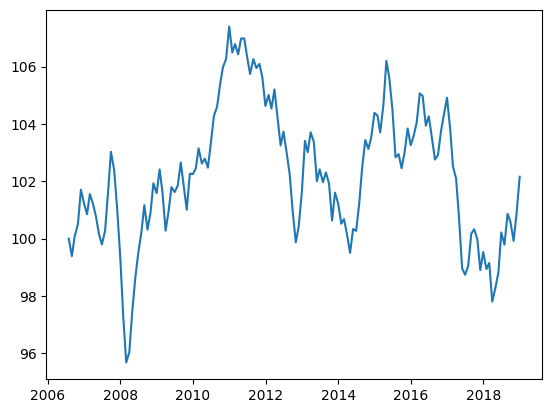

In [35]:
DF = pd.DataFrame()
#n = pd.DataFrame()
DF['value'] = y
#n['value'] = X_l
DF = DF.set_index(dt_arr)
#n = n.set_index(dt_arr)
plt.plot(DF)
#plt.plot(n)

In [ ]:
pearsonr(X_l[1950:2100], y[1950:2100])

pearsonr(np.array(train_data["equity"][150:300]), y[150:300])

In [6]:
for i in range(len(X)):
        X[i][0] = X[i][0][6:]
for i in range(len(X_test)):
        X_test[i][0] = X_test[i][0][6:]

X_day = np.zeros((X.shape[0],1));
X_month = np.zeros((X.shape[0],1));
X_year = np.zeros((X.shape[0],1));

X_test_day = np.zeros((X_test.shape[0],1));
X_test_month = np.zeros((X_test.shape[0],1));
X_test_year = np.zeros((X_test.shape[0],1));

for i in range(len(X)):
    X_year[i]=X_date[i][0:4]
    X_month[i]=X_date[i][5:7]
    X_day[i]=X_date[i][8:10]

for i in range(len(X_test)):
    X_test_year[i]=X_test_date[i][0:4]
    X_test_month[i]=X_test_date[i][5:7]
    X_test_day[i]=X_test_date[i][8:10]
X_date = X_date.reshape((X_date.shape[0],1))
X_test_date = X_test_date.reshape((X_test_date.shape[0],1))

X_combined = np.hstack([X_day,X_year,X_month,X])
X_test_combined = np.hstack([X_test_day, X_test_year, X_test_month,X_test])
y = train_data["price"].astype('float32')

In [39]:
clf = RandomForestRegressor(n_estimators =10 , criterion='squared_error',max_depth=30, random_state=0)
clf.fit(X_combined, y)
print(clf.score(X_combined,y)*100)
y_test = clf.predict(X_test_combined)

99.31811805489308


In [40]:
y_predict=clf.predict(X_combined)
mean_squared_error(y,y_predict)

0.7231415940206052